#**NETFLİX VERİ ANALİZİ PROJESİ**

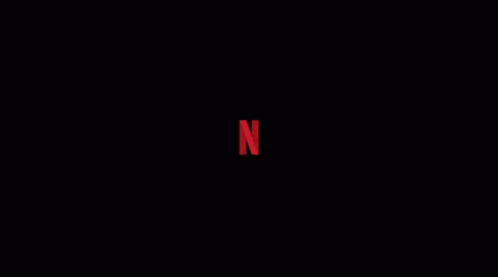

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings("ignore")

# LOADING AND UNDERSTANDING DATA

In [ ]:
data = pd.read_csv("NetflixOriginals.csv", encoding="windows_1258") #Datayı okuyalım

In [ ]:
#Datanın ilk 5 sütununa bakarak genel yapısını öğrenelim

data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [ ]:
#Datanın büyüklüğü hakkında bilgi alalım

print("Veri setindeki toplam satır sayısı:", data.shape[0])
print("Veri setindeki toplam sütun sayısı:", data.shape[1])

Veri setindeki toplam satır sayısı: 584
Veri setindeki toplam sütun sayısı: 6


In [ ]:
 #Datadaki sayısal değişkenlerin dağılımını Transpose olarak görelim

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Runtime,584.0,93.577055,27.761683,4.0,86.0,97.00,108.0,209.0
IMDB Score,584.0,6.271747,0.979256,2.5,5.7,6.35,7.0,9.0


In [ ]:
#Datadaki sütunların veri tipleri hakkında bilgi alalım

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       584 non-null    object 
 1   Genre       584 non-null    object 
 2   Premiere    584 non-null    object 
 3   Runtime     584 non-null    int64  
 4   IMDB Score  584 non-null    float64
 5   Language    584 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 27.5+ KB


In [ ]:
data["Date"] = pd.to_datetime(data.Premiere) # "Premiere" sütunundaki stringer olan tarih bilgileri tarih formatına çevrildi ve "Date" sütunu olarak atandı

data['Day'] = data['Date'].dt.day_of_week # "Day" adında günleri temsil eden bir sütun oluşturuldu
data['Month'] = data['Date'].dt.month  # "Month" adında ayları temsil eden bir sütun oluşturuldu
data['Year'] = data['Date'].dt.year # "Year" adında yılları temsil eden bir sütun oluşturuldu

data.drop("Premiere", axis=1, inplace=True) # "Premiere" sütununa artık gerek kalmadı

data.head()

,Title,Genre,Runtime,IMDB Score,Language,Date,Day,Month,Year
0,Enter the Anime,Documentary,58,2.5,English/Japanese,2019-08-05,0,8,2019
1,Dark Forces,Thriller,81,2.6,Spanish,2020-08-21,4,8,2020
2,The App,Science fiction/Drama,79,2.6,Italian,2019-12-26,3,12,2019
3,The Open House,Horror thriller,94,3.2,English,2018-01-19,4,1,2018
4,Kaali Khuhi,Mystery,90,3.4,Hindi,2020-10-30,4,10,2020


In [ ]:
#Datasetinde tekrarlı verinin olup olmadığını kontrol edelim.

print("Veri setinde kopyalanmış/tekrarlanmış veri sayısı:", data.duplicated().sum())

Veri setinde kopyalanmış/tekrarlanmış veri sayısı: 0


Veri setinde kopyalı/tekrarlı bir data bulunmamaktadır

In [ ]:
print("Veri setindeki eksik veri sayısı - Değişken bazlı gösterim:\n", data.isnull().sum()) #Değişken bazlı eksik değer var mı?
print("\nVeri setindeki toplam eksik veri sayısı:", (data.isnull().sum()).sum()) #Genel olarak veri setinde eksik değer var mı?

Veri setindeki eksik veri sayısı - Değişken bazlı gösterim:
 Title         0
Genre         0
Runtime       0
IMDB Score    0
Language      0
Date          0
Day           0
Month         0
Year          0
dtype: int64

Veri setindeki toplam eksik veri sayısı: 0


Veri setinin hiçbir değişkeninde eksik değer bulunmamaktadır

# EXPLORATORY DATA ANALYSIS

## 1. Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

In [ ]:
runtime_threshold = 130.0 #Runtime değeri 130.0'dan büyük olan filmlere Uzun soluklu filmler diyelim

runtime_thresh_data = data[data.Runtime >=runtime_threshold].sort_values(by="Runtime", ascending=False) #Runtime değeri 130.0'dan büyük olan filmlerin datası

runtime_thresh_data

,Title,Genre,Runtime,IMDB Score,Language,Date,Day,Month,Year
561,The Irishman,Crime drama,209,7.8,English,2019-11-27,2,11,2019
328,Da 5 Bloods,War drama,155,6.5,English,2020-06-12,4,6,2020
581,Springsteen on Broadway,One-man show,153,8.5,English,2018-12-16,6,12,2018
247,Citation,Drama,151,6.2,English,2020-11-06,4,11,2020
284,The Forest of Love,Drama,151,6.3,Japanese,2019-10-11,4,10,2019
543,Ludo,Anthology/Dark comedy,149,7.6,Hindi,2020-11-12,3,11,2020
509,Raat Akeli Hai,Thriller,149,7.3,Hindi,2020-07-31,4,7,2020
7,The Last Days of American Crime,Heist film/Thriller,149,3.7,English,2020-06-05,4,6,2020
194,Army of the Dead,Zombie/Heist,148,5.9,English,2021-05-21,4,5,2021
5,Drive,Action,147,3.5,Hindi,2019-11-01,4,11,2019


 

*   'Runtime'ı 130.0 dk üstü olan filmleri uzun solluklu film olarak belirledik.
*    Buna göre bu eşik değerinden büyük olan filmlere uzun soluklu filmler, küçük olan filmlere de kısa soluklu filmler denmektedir.
*   Veri setini sınır değerden yüksek olanlara göre filtrelediğimizde, çoğu İngilizce çekilmiş toplam 37 tane uzun soluklu filmin olduğunu görmekteyiz. 
*   En uzun film ise 27 Kasım 2019'da İngilizce olarak "Suç Draması" türünde çekilen ve 209 runtime değerine sahip olan "The Irıshman"dir.






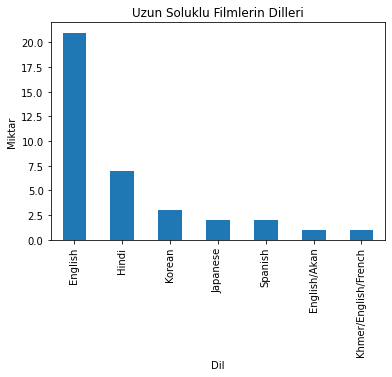

In [ ]:
#Görselleştirelim
runtime_thresh_data["Language"].value_counts().plot(kind='bar')
plt.title("Uzun Soluklu Filmlerin Dilleri")
plt.xlabel("Dil")
plt.ylabel("Miktar")
plt.xticks(rotation=90)
plt.show()

#Cevap=English.

Yukarıdaki grafikten de anlaşılacağı üzere, uzun soluklu filmlerin çoğu İngilizce olarak çekilmiştir (20'den fazla İngilizce film uzun solukludur).

İngilizceden sonra uzun soluklu filmler sırasıyla şu dillerde çekilmiştir;
1. Hindi dili
2. Korece
3. Japonca
4. İspanyolca
5. İngilizce/Gana ve Fildişi Dili
6. Kampoçya/İngilzce/Fransızca

## 2. 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

In [ ]:
ocak = 1
haziran = 6

baslangic = (data["Year"]==2019) & (data["Month"]>=ocak)
bitis = (data["Year"]==2020) & (data["Month"]<=haziran)



*   Veri setindeki "Month" değişkeninde Ocak ayı 1 olarak tanımlıdır. Bu sebeple ocak değişkenini 1 gözlemi olarak atadık. Ayrıca Haziran ayı ise 6 olarak tanımlıdır. Bu nedenle haziran adıyla 6 gözlemine eşit olan bir değişken atadık

*   Akabinde veri setinde Ocak 2019 sonrasını gösteren "baslangic" adında bir değişken atadık ve Haziran 2020 öncesini belirleyen "bitis" adıyla bir değişken atadık

*   Şimdi "baslangic" ve "bitis" değişkenlerini kullanarak Ocak 2019 ile Haziran 2020 tarihleri arasında "Belgesel" türünde çekilen filmlerin IMDB değerlerini bir dataframe üzerinde gösterelim.












In [ ]:
tarih_araligi = data.loc[:, ["Genre","IMDB Score", "Date"]][data["Genre"] == "Documentary"][baslangic | bitis] #Başlangıç ve Bitiş aralığını tablo haline getirdik

tarih_araligi.sort_values(by = "Date", ascending=True) #Bu tabloyu tarihsel sıralamaya göre gösterelim

,Genre,IMDB Score,Date
510,Documentary,7.3,2019-01-11
482,Documentary,7.2,2019-01-18
511,Documentary,7.3,2019-02-08
524,Documentary,7.4,2019-02-12
324,Documentary,6.5,2019-03-21
444,Documentary,7.0,2019-03-22
286,Documentary,6.3,2019-03-29
536,Documentary,7.5,2019-04-17
554,Documentary,7.7,2019-04-19
462,Documentary,7.1,2019-04-20


Yukarıdaki tabloya göre 53 tane Belgesel türünde film Ocak 2019 ile Haziran 2020 tarihleri arasında çekilmiştir. 

Şimdi de bu filmlerin çekim tarihleri ile IMDB Puanlarını bir grafik üzerinden görelim

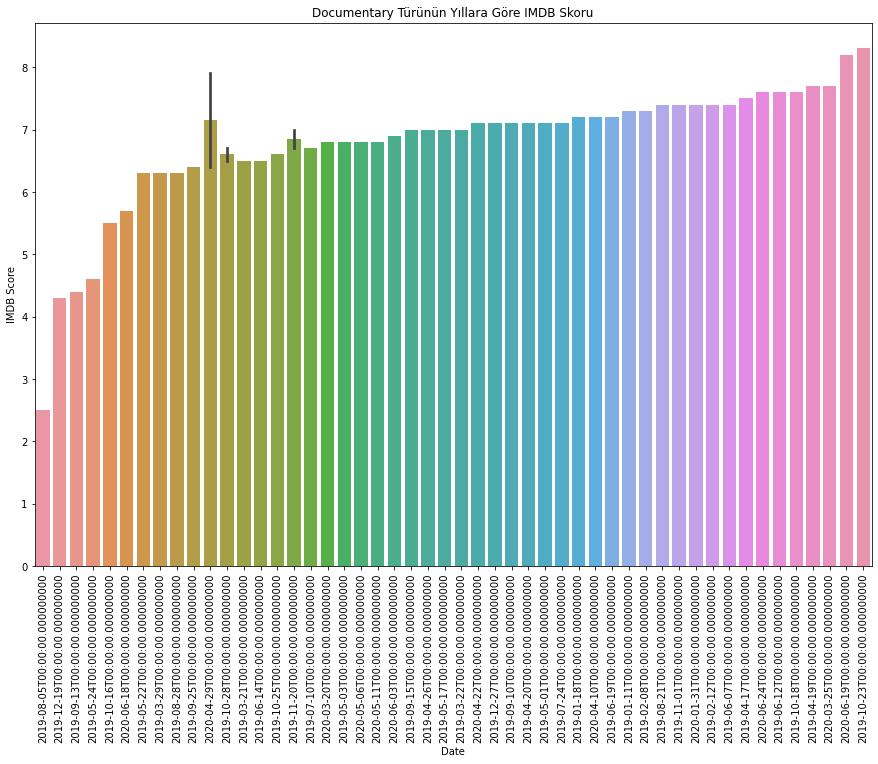

In [ ]:
#Görselleştirelim
plt.figure(figsize=(15,10))
sns.barplot(tarih_araligi["Date"], tarih_araligi["IMDB Score"])
plt.title("Documentary Türünün Yıllara Göre IMDB Skoru")
plt.xticks(rotation=90)
plt.show()

* 23 Ekim 2019 yılında çekilen bir Belgesel 8.3'lük bir IMDB Puanıyla en yüksek puana sahiptir. 
* 5 Ağustos 2019 tarihinde çekilen bir Belgesel ise 2.5 IMDB Puanıyla en düşük puana sahiptir.

## 3. İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

In [ ]:
#Veri setini yalnızca İngilizce filmlerin olduğu ve bu filmler arasında en yüksek IMDB Puanına sahip dilm türüne göre filtreleyelim
english_best_imdb = data.loc[:, ["Language", "IMDB Score", "Genre"]][data["IMDB Score"] == data["IMDB Score"].max()][data["Language"] == "English"] 

# Şimdi de bu filtreleme sonucu ekrana yazdıralım
english_best_imdb

,Language,IMDB Score,Genre
583,English,9.0,Documentary


Filtreleme sonucunda İngilizce çekilen film türleri içerisinde Belgesel, 9.0 IMDB Puanıyla en yüksek IMDB puanına sahip film türü olduğunu görüyoruz

## 4. 'Hindi' dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?


In [ ]:
#Veri setinde yalnızca Hindi dilinin olduğu filmlerin runtime değerlerine ulaşıp mean() fonksiyonuyla ortalamalarını alalım
hindi_mean =  data["Runtime"][data["Language"] == "Hindi"].mean()

#Şimdi de buna yazdıralım
print("Hindi dilinde çekilen filmlerin ortalama 'runtime' süresi:", hindi_mean)

Hindi dilinde çekilen filmlerin ortalama 'runtime' süresi: 115.78787878787878


## 5. 'Genre' sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.

In [ ]:
#Genre sütunundaki toplam kategorilerin sayılarına erişelim
total_genre_cats = len(data.Genre.unique())

#Şimdi de buna yazdıralım
print("Genre sütunundaki toplam kategori sayısı:", total_genre_cats)

Genre sütunundaki toplam kategori sayısı: 115


In [ ]:
#Genre sütunundaki tüm kategorileri all_genre_cats değişkenine atayalım
all_genre_cats = data.Genre.unique()

#Şimdi de tüm bu kategorileri ekrana yazdıralım
print("Genre sütunundaki kategoriler:\n", all_genre_cats)

Genre sütunundaki kategoriler:
 ['Documentary' 'Thriller' 'Science fiction/Drama' 'Horror thriller'
 'Mystery' 'Action' 'Comedy' 'Heist film/Thriller'
 'Musical/Western/Fantasy' 'Drama' 'Romantic comedy' 'Action comedy'
 'Horror anthology' 'Political thriller' 'Superhero-Comedy' 'Horror'
 'Romance drama' 'Anime / Short' 'Superhero' 'Heist' 'Western'
 'Animation/Superhero' 'Family film' 'Action-thriller' 'Teen comedy-drama'
 'Romantic drama' 'Animation' 'Aftershow / Interview' 'Christmas musical'
 'Science fiction adventure' 'Science fiction' 'Variety show'
 'Comedy-drama' 'Comedy/Fantasy/Family' 'Supernatural drama'
 'Action/Comedy' 'Action/Science fiction' 'Romantic teenage drama'
 'Comedy / Musical' 'Musical' 'Science fiction/Mystery' 'Crime drama'
 'Psychological thriller drama' 'Adventure/Comedy' 'Black comedy'
 'Romance' 'Horror comedy' 'Christian musical' 'Romantic teen drama'
 'Family' 'Dark comedy' 'Comedy horror' 'Psychological thriller' 'Biopic'
 'Science fiction/Thriller' 'M

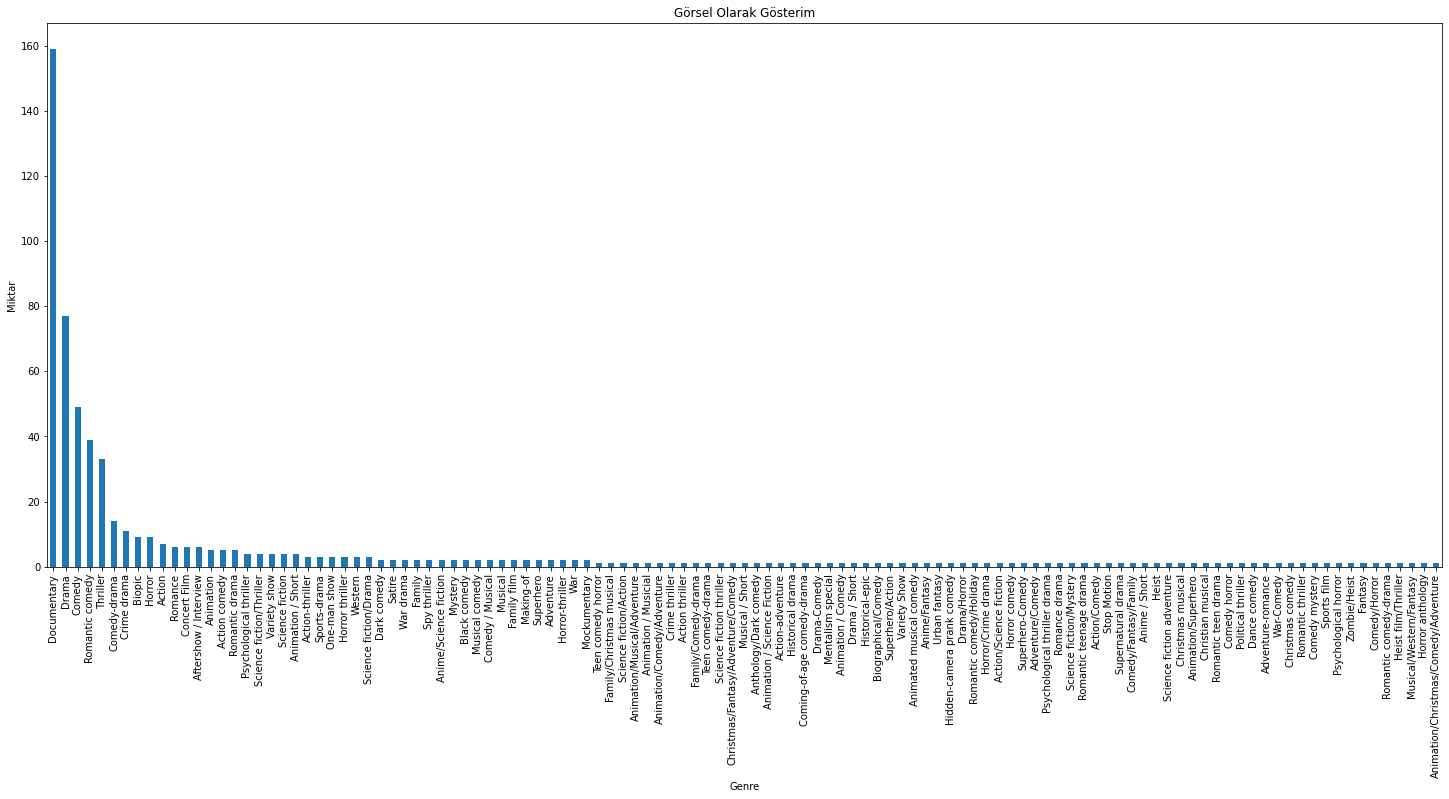

In [ ]:
#Genredeki bu kategorilerin sayısal dağılımını grafik üzerinden görelim

plt.figure(figsize = (25,10))
data.Genre.value_counts().plot(kind='bar')
plt.title("Görsel Olarak Gösterim")
plt.xlabel("Genre")
plt.ylabel("Miktar")
plt.xticks(rotation=90)
plt.show()

Grafikte görüldüğü üzere, Genre değişkeninde en çok bulunan Belgesel (yaklaşık 160 tane) bulunmaktadır. Bunu Drama ve Komediizlemektedir. En az bulunan film türü ise Animasyon/Cristmas/Komedy/Macera film türüdür.

Demek ki insanlar Belgesel, Drama ve Komedi tarzı film türlerini daha çok talep etmekteyken; diğer film türlerine fazla rağbet etmemektedir



## 6. Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.


In [ ]:
#Hangi dilde ne kadar filmin çekildiği value_count() fonksiyonuyla bir değişkende tutalım
val_counts = data.Language.value_counts()

#Şimdi de bu değişkenin ilk üç değerini (yani en çok kullanılan 3 dili) ekrana yazdıralım
print("En çok kullanılan 3 dil:")
print(val_counts[:3])

En çok kullanılan 3 dil:
English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64


## 7. IMDB puanı en yüksek olan ilk 10 film hangileridir?

In [ ]:
#Veri setini IMDB Puanı ile Filmin İsmi değişkenlerine göre filtereleyim. Akabinde IMDB Puanı azalana göre filtreleyip ekrana tablo halinde yazdıralım

data.loc[:, ["IMDB Score", "Title"]].iloc[data["IMDB Score"].sort_values(ascending=False)[:10].index]

,IMDB Score,Title
583,9.0,David Attenborough: A Life on Our Planet
582,8.6,Emicida: AmarElo - It's All For Yesterday
581,8.5,Springsteen on Broadway
580,8.4,Winter on Fire: Ukraine's Fight for Freedom
579,8.4,Taylor Swift: Reputation Stadium Tour
578,8.4,Ben Platt: Live from Radio City Music Hall
577,8.3,Dancing with the Birds
576,8.3,Cuba and the Cameraman
573,8.2,Klaus
571,8.2,13th


Tabloda IMDB Puanı en yüksek ilk 10 filmi görebiliriz.

## 8. IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

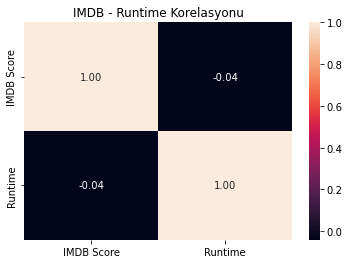

In [ ]:
corr = data.loc[:, ["IMDB Score", "Runtime"]].corr()

sns.heatmap(corr, annot = True, fmt=".2f")
plt.title("IMDB - Runtime Korelasyonu")
plt.show() 

#Tabloda %4 oranında negatif korelasyon var olduğunu görüyoruz


IMDB puanı ve Runtime arasındaki korelasyonu incelemek için 'HeatMap' kullandık. Ve grafiğe göre %4 oranında negatif bir ilişki olduğunu gözlemledik. Ancak bu bize birşey ifade etmiyor. Yani süre ve IMDB puanı arasında kayda değer bir ilişki yoktur.

## 9. IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

In [1]:
imdb_10_genre = data.loc[:, ["IMDB Score", "Genre"]].iloc[data["IMDB Score"].sort_values(ascending=False)[:10].index]
imdb_10_genre

NameError: ignored

In [ ]:
#countplot ile görselleştirelim

sns.countplot(imdb_10_genre.Genre)
plt.xticks(rotation=45)
plt.title("IMDB Skoru En Yüksek 10 Genre")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#scatterplot ile görselleştirelim

plt.figure(figsize=(5,5))
sns.scatterplot(x= "Genre", y= "IMDB Score", data=imdb_10_genre)
plt.title("IMDB Skoru En Yüksek 10 Genre Dağılımı")
plt.xticks(rotation=45)
plt.show()

IMDB Puanı en yüksek olan ilk 10 'Genre' - 'Tür' de göreslleştirmede gördüğümüz üzere 4 tür mevcuttur.


1.   Documentary / Belgesel
2.   One- man show / Tek kişilik gösteri
3.   Concert Film / Konser
4.   Animation etc. / Animasyon v.d





## 10. 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

In [ ]:
runtime_10_film = data.loc[:, ["Runtime", "Title"]].iloc[data["Runtime"].sort_values(ascending=False)[:10].index]
runtime_10_film

,Runtime,Title
561,209,The Irishman
328,155,Da 5 Bloods
581,153,Springsteen on Broadway
247,151,Citation
284,151,The Forest of Love
509,149,Raat Akeli Hai
7,149,The Last Days of American Crime
543,149,Ludo
194,148,Army of the Dead
5,147,Drive


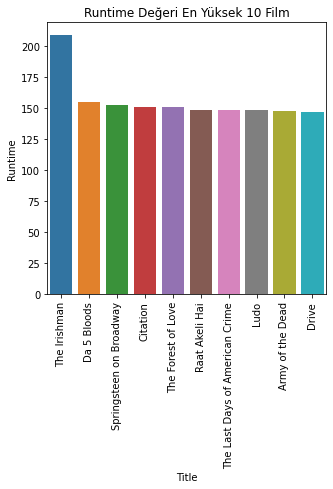

In [ ]:
#Görselleştirelim

plt.figure(figsize=(5,5))
sns.barplot(x= "Title", y= "Runtime", data=runtime_10_film)
plt.title("Runtime Değeri En Yüksek 10 Film")
plt.xticks(rotation=90)
plt.show()

RunTime değeri en yüksek olan ilk 10 film görselleştirme de görmüş olduğumuz üzere

İlk üç

1.   The Irishman
2.   De 5 Bloods
3.   Springsteen on Broadway

Son üç

8.  Ludo
9.  Army of the Dead
10. Drive



## 11. Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.


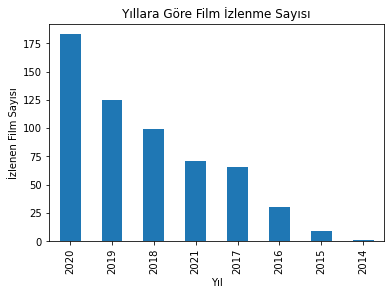

In [ ]:
data["Year"].value_counts().plot(kind="bar")
plt.title("Yıllara Göre Film İzlenme Sayısı")
plt.xlabel("Yıl")
plt.ylabel("İzlenen Film Sayısı")
plt.show()

Yıllara göre film izleme sayısına baktığımızda 2020 yılında en fazla izlenme oranı varken, 2017 yılıyla karşılaştırdığımızda ise neredeyse %100 bi artış olduğunu gözlemlemekteyiz.

## 12. Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.

In [ ]:
threshold = 4.5 # IMDB puanı 5.0 altında olanlar düşük olarak belirleyelim

film_worst_imdb = data.loc[:,["Language", "IMDB Score"]][data["IMDB Score"] < threshold]
film_worst_imdb

,Language,IMDB Score
0,English/Japanese,2.5
1,Spanish,2.6
2,Italian,2.6
3,English,3.2
4,Hindi,3.4
5,Hindi,3.5
6,Turkish,3.7
7,English,3.7
8,English,3.9
9,Hindi,4.1


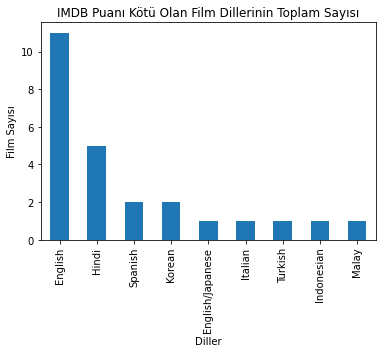

In [ ]:
# IMDB puanı kötü olan film dillerinin toplam sayısının görselleştirilmesi

film_worst_imdb.Language.value_counts().plot(kind="bar")
plt.title("IMDB Puanı Kötü Olan Film Dillerinin Toplam Sayısı")
plt.xlabel("Diller")
plt.ylabel("Film Sayısı")
plt.show()

IMDB puanı en düşük olan filmlerinde yapılan görselleştirmelere baktığımızda ise İngilizce açık ara bir farkla grafiğin en başında bulunmaktadır. Bununla birlikte  İngilizce-Japonca, İtalyanca, Türkçe, Endonezya ve Malezya dilleri ise aynı oranla sıralamada yer almışlardır.

## 13. Hangi yılın toplam "runtime" süresi en fazladır?

In [ ]:
years_runtime = data[["Year", "Runtime"]].groupby("Year").sum()

years_runtime #Tablo olarak gösterim

,Runtime
Year,
2014,81
2015,814
2016,2766
2017,6129
2018,9405
2019,10856
2020,17384
2021,7214


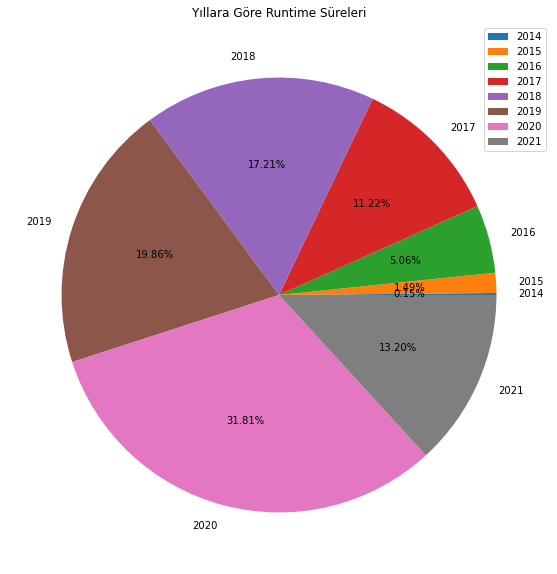

In [ ]:
#Dilim olarak görselleştirelim

plt.figure(figsize=(10,10))
plt.pie(years_runtime["Runtime"], autopct="%.2f%%", labels=years_runtime.index)
plt.legend()
plt.title("Yıllara Göre Runtime Süreleri")
plt.show()

#Baktık ki, 2020 yılındaki runtime süresi en fazlaymış.

2020 yılında %31.81 oranıyla en fazla yüzdeliğe sahi oldup ilk sırada bulunurken, 2014 yılında ise %0.15 oranıyla ise en az 'Runtime' süresi olduğunu gözlemlemekteyiz.

## 14. Her bir dilin en fazla kullanıldığı "Genre" nedir?

In [ ]:
def lang_most_genre(data, langs):
    for lang in langs:
        genre = data["Genre"][data["Language"] == lang].mode()[0]
        count = data["Genre"][data["Language"] == lang].value_counts()[0]
        if count > 1:
            print(f"{lang} dilinin/dillerinin en çok kullanıldığı Genre:")
            print(f"{genre}({count} film)")
        else:
            print(f"{lang} dili/dilleri filmlerde en fazla 1 kez kullanılmıştır.")
        print("*"*32)

langs=data.Language.unique()
lang_most_genre(data,langs)

English/Japanese dili/dilleri filmlerde en fazla 1 kez kullanılmıştır.
********************************
Spanish dilinin/dillerinin en çok kullanıldığı Genre:
Documentary(8 film)
********************************
Italian dilinin/dillerinin en çok kullanıldığı Genre:
Drama(4 film)
********************************
English dilinin/dillerinin en çok kullanıldığı Genre:
Documentary(120 film)
********************************
Hindi dilinin/dillerinin en çok kullanıldığı Genre:
Drama(13 film)
********************************
Turkish dilinin/dillerinin en çok kullanıldığı Genre:
Comedy(2 film)
********************************
Korean dilinin/dillerinin en çok kullanıldığı Genre:
Drama(2 film)
********************************
Indonesian dilinin/dillerinin en çok kullanıldığı Genre:
Drama(3 film)
********************************
Malay dili/dilleri filmlerde en fazla 1 kez kullanılmıştır.
********************************
Dutch dili/dilleri filmlerde en fazla 1 kez kullanılmıştır.
********************

Her bir dilin en fazla kullanıldığı 'Genre'lara tek tek baktık. Ve listeledik.

## 15. Veri setinde outlier veri var mıdır? Açıklayınız.

Runtime değişkeninde outlier değer/değerler bulundu.
Görselleştiriliyor..


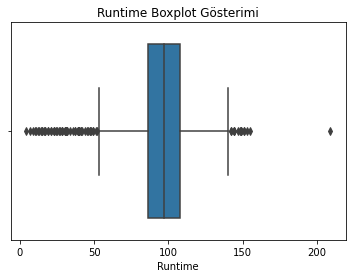

Runtime değişkeninde toplam 75 outlier bulundu.
**************************************************
IMDB Score değişkeninde outlier değer/değerler bulundu.
Görselleştiriliyor..


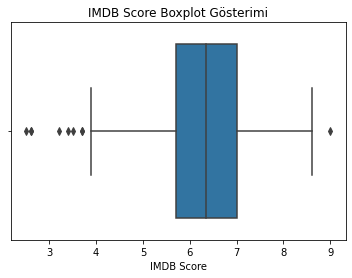

IMDB Score değişkeninde toplam 9 outlier bulundu.
**************************************************


In [ ]:
#Veri Setinde yalnızca Runtime ve IMDB değişkenlerinde outlier arayacağız. DİĞER DEĞİŞKENLERDEN OLMASI GEREKENLER VARSA BELİRTİNİZ.

def outlier_detect(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3- Q1
        
        alt_outlier_esik = Q1 - IQR*1.5
        ust_outlier_esik = Q3 + IQR*1.5
        
        toplam_outlier = (data[col] < alt_outlier_esik).sum() + (data[col] > ust_outlier_esik).sum()
        
        if toplam_outlier > 0:
            print(f"{col} değişkeninde outlier değer/değerler bulundu.")
            print("Görselleştiriliyor..")
            sns.boxplot(data[col])
            plt.title("{} Boxplot Gösterimi".format(col))
            plt.show()
            print(f"{col} değişkeninde toplam {toplam_outlier} outlier bulundu.")
            print("*"*50)
        else:
            print(f"{col} değişkeninde herhangi bir outlier değer bulunmamıştır.")
            
outlier_detect(data, ["Runtime", "IMDB Score"])

Son olarak da veri setimizde Outliner veri olup olmadığını görmek için John Tukey'in bu alana 1977 yılında kattığı ve detaylı bir veri analizi grafiği olan 'Box Plot'u kullanıyoruz. Runtime için 75 outliner (yani ayrık veri) tesbit edilmiştir. IMDB puanı için ise 9 outliner olduğunu grafşk yardımı ile görmüş olduk. Bu outliner verilerin ise Z-Scorunu hesaplar (3-sigma) kuralını uygulayarak min-max belirleriz. Null değerleri bulup fillnull ile null'ları doldururuz.

Global AI Hub bünyesinde yapılan 'Python Bootcamp' çerçevesinde verilen proje ödevinde görev alanlar.


*   Rukiye KAYMAK / rukiyekaymakk@gmail.com
*   Fatih DEMİR / demirfatih.tr@gmail.com
*   Gürkan TÖNGEL / tongelgurkan97@gmail.com
*   Nurunnisa KAPLAN / nurunnisa.kaplan@gmail.com
*   Eyüp YAĞAN / eyupyagan@gmail.com
*   Elif GÖBÜT-TEKİN / gobutelif@gmail.com
*   Taner SÜLEYMAN / taner.suleyman@gmail.com




